In [17]:
! pip install yfinance
! pip show tensorflow
! pip show keras


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\akell\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Name: keras
Version: 3.6.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\akell\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow_intel


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [3]:
start = '1998-1-1'
end = datetime.now().strftime('%Y-%m-%d')
df = yf.download('AAPL', start=start, end=end)

df.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1998-01-02 00:00:00+00:00,0.122389,0.145089,0.145089,0.120536,0.121652,718110400
1998-01-05 00:00:00+00:00,0.119565,0.141741,0.147879,0.135603,0.147321,651873600
1998-01-06 00:00:00+00:00,0.142631,0.169085,0.178571,0.131696,0.142299,1812473600
1998-01-07 00:00:00+00:00,0.131804,0.156250,0.169643,0.154576,0.167969,1041622400
1998-01-08 00:00:00+00:00,0.136982,0.162388,0.166295,0.151228,0.155692,774020800


In [4]:
df =df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,1998-01-02 00:00:00+00:00,0.122389,0.145089,0.145089,0.120536,0.121652,718110400
1,1998-01-05 00:00:00+00:00,0.119565,0.141741,0.147879,0.135603,0.147321,651873600
2,1998-01-06 00:00:00+00:00,0.142631,0.169085,0.178571,0.131696,0.142299,1812473600
3,1998-01-07 00:00:00+00:00,0.131804,0.156250,0.169643,0.154576,0.167969,1041622400
4,1998-01-08 00:00:00+00:00,0.136982,0.162388,0.166295,0.151228,0.155692,774020800


In [5]:

df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,1998-01-02 00:00:00+00:00,0.122389,0.145089,0.145089,0.120536,0.121652,718110400
1,1998-01-05 00:00:00+00:00,0.119565,0.141741,0.147879,0.135603,0.147321,651873600
2,1998-01-06 00:00:00+00:00,0.142631,0.169085,0.178571,0.131696,0.142299,1812473600
3,1998-01-07 00:00:00+00:00,0.131804,0.156250,0.169643,0.154576,0.167969,1041622400
4,1998-01-08 00:00:00+00:00,0.136982,0.162388,0.166295,0.151228,0.155692,774020800


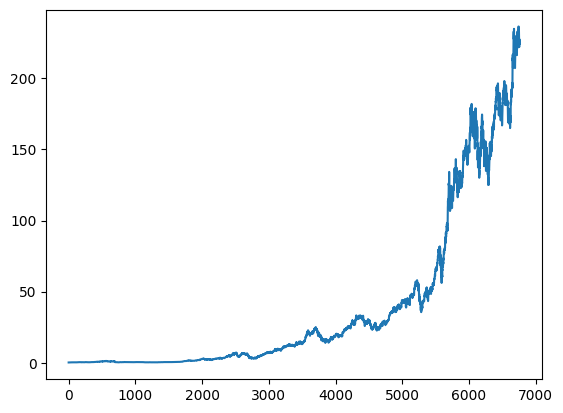

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6754,223.6783
6755,223.7806
6756,223.8887
6757,224.0154


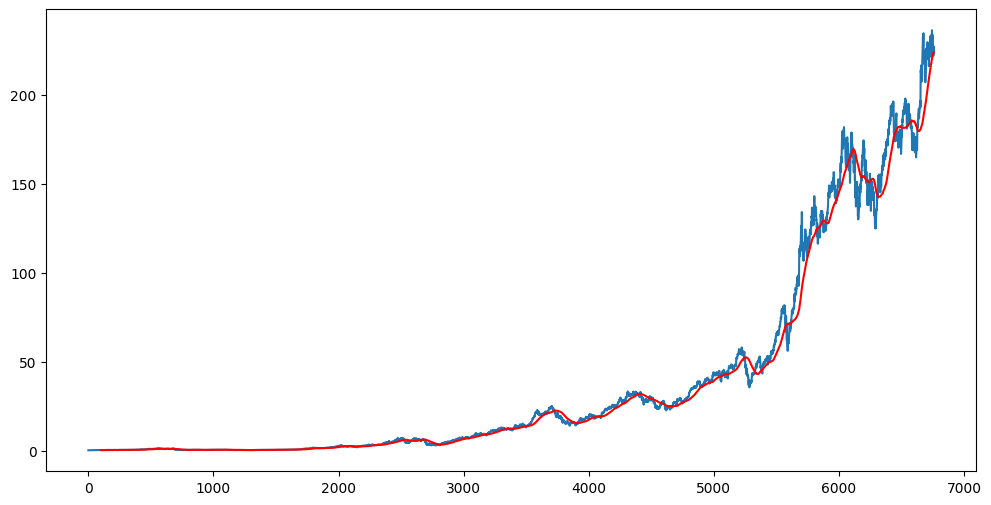

In [8]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6754,202.45250
6755,202.59020
6756,202.75510
6757,202.91905


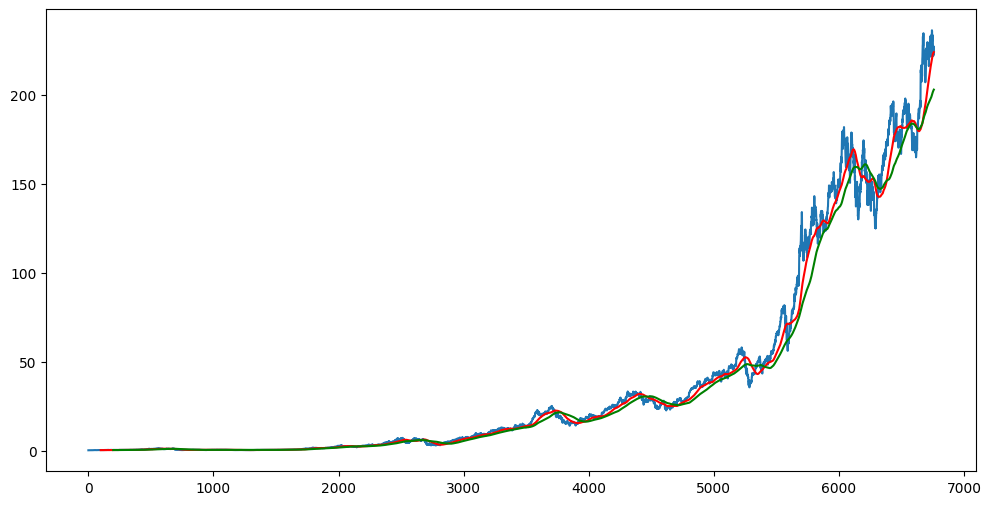

In [10]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(4731, 1)
(2028, 1)


In [12]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.01123040e-04],
       [0.00000000e+00],
       [8.25896744e-04],
       ...,
       [8.83337289e-01],
       [8.82733197e-01],
       [8.80090363e-01]])

In [14]:
x_train=[]
y_train = []
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [15]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [33]:
from keras.engine import sequential
model = Sequential()
model.add(LSTM(units = 50 ,activation = 'relu', return_sequences = True,input_shape =(x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 ,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 ,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

ModuleNotFoundError: No module named 'keras.engine'

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs =10)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - loss: 0.0449
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - loss: 0.0041
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - loss: 0.0042
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.0044
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.0046
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - loss: 0.0038
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - loss: 0.0034
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 22s 153ms/step - loss: 0.0029
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - loss: 0.0030
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - loss: 0.0028


In [26]:
model.save('keras_model.h5')

In [27]:
past_100_days = data_training.tail(100)

In [29]:
final_df =past_100_days.append(data_testing,ignore_index = True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [30]:
final_df.head()

NameError: name 'final_df' is not defined

In [31]:
input_data = scaler.fit_transform(final_df)
input_data


NameError: name 'final_df' is not defined

In [27]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
  

In [28]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1961, 100, 1)
(1961,)


In [29]:
y_predicted = model.predict(x_test)


62/62 [==============================] - 4s 55ms/step


In [30]:
y_predicted.shape

(1961, 1)

In [31]:
scaler.scale_

array([0.00569719])

In [32]:
scaler_factor = 1/0.00717991
y_predicted = y_predicted*scaler_factor
y_test = y_test*scaler_factor

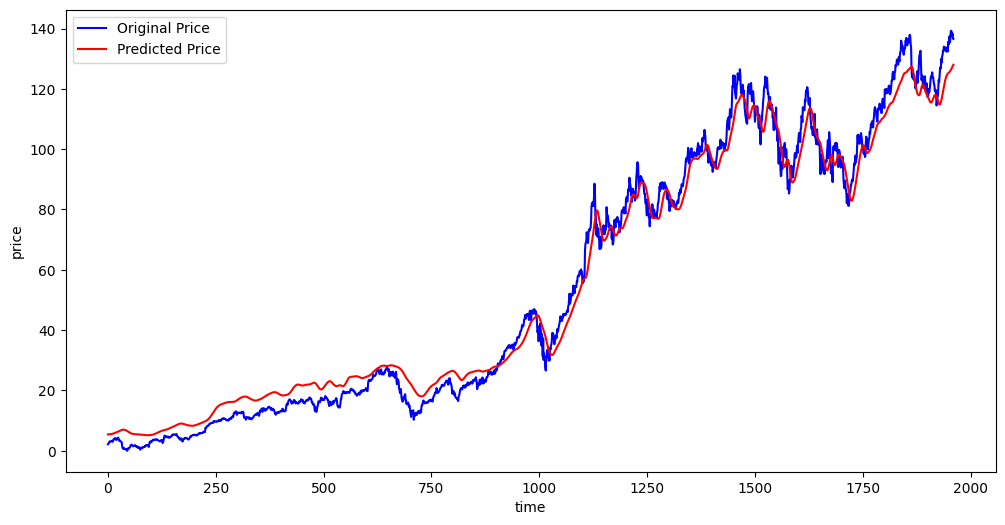

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

# New Section